## Observations and Insights 

From the scatter plot below, Capomulin seems to work better on mice that weigh less, they have a greater decrease in tumor volume than heavier mice.

There is one outlier for Infubinol but its last timepoint is 5 so it may have died, though it had a much lower tumor volume than the rest of the mice treated with Infubinol.

Of the four regimens that we took a deeper look into Capomulin and Ramicane seem to be much more effective in lowering the tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Finding the number of unique mice in the dataset
unique_mice = df["Mouse ID"].nunique()
unique_mice

249

In [3]:
# Using .drop_duplicates to get rid of all the duplicate time points
dupeless_time = df.drop_duplicates(["Mouse ID", "Timepoint"], keep = "last")

# Checking the duplicate time points to see which mouse it was using ~ to say "I want the things 
# in the original dataset that arent in this other dataset"
dupeful = df[~df.index.isin(dupeless_time.index)]
dupeful

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Getting all the data for the mouse with the duplicates, poor little lost mouse
lost_mouse = df.loc[df["Mouse ID"] == "g989",:]
lost_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Losing the lost mouse so they can go have their own adventure
clean = df.loc[df["Mouse ID"] != "g989",:]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Making sure we have the right number of mice in out dataset
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Grouping by drug regimen and finding the mean, median, variance, standard deviation, and SEM for each regimen
regimen_group = clean.groupby("Drug Regimen")
tumean = regimen_group["Tumor Volume (mm3)"].mean()
tumed = regimen_group["Tumor Volume (mm3)"].median()
tuvar = regimen_group["Tumor Volume (mm3)"].var()
tustd = regimen_group["Tumor Volume (mm3)"].std()
tusem = regimen_group["Tumor Volume (mm3)"].sem()

# Putting it all into a dataframe and printing it out
tumor_df = pd.DataFrame({
    "Mean": tumean,
    "Median": tumed,
    "Variance": tuvar,
    "Standard Deviation": tustd,
    "SEM": tusem
})
tumor_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Doing the same thing as above but using the .agg function to wrap it all nicely in one line of code
tumor_df_agg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

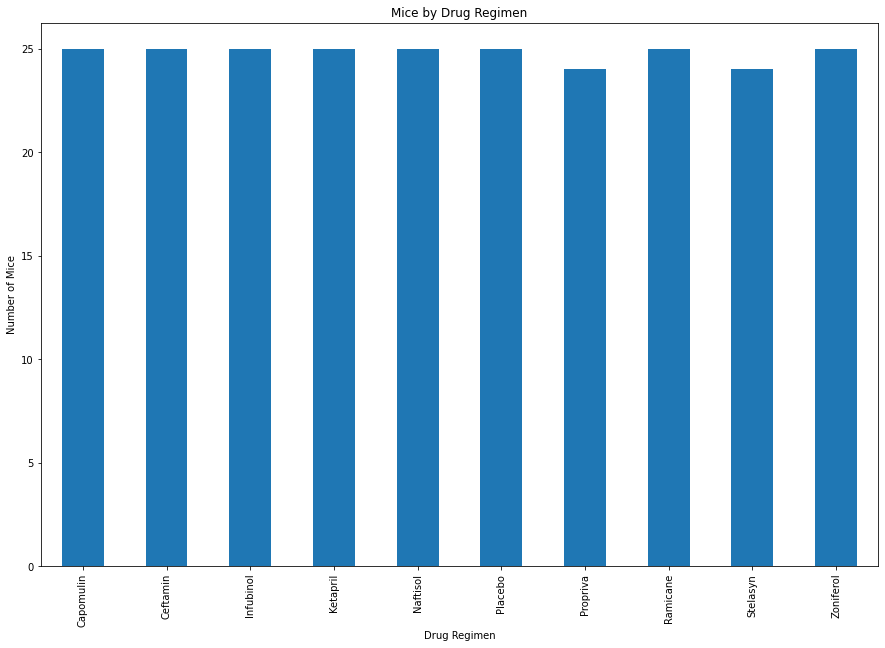

In [9]:
# Putting just the data from the "Mouse ID" and "Drug Regimen" columns into a variable
regimenbar = clean[["Mouse ID","Drug Regimen"]]

# Grouping by "Drug Regimen" and finding the number of unique mice to use for the bar chart
regimenbar = regimenbar.groupby("Drug Regimen")["Mouse ID"].nunique()

# Plotting the bar chart and also storing it as a variable so we can set the y label
chart = regimenbar.plot(kind = "bar", title= "Mice by Drug Regimen", figsize=(15,10))
chart.set_ylabel("Number of Mice")

Text(0.5, 1.0, 'Mice by Drug Regimen')

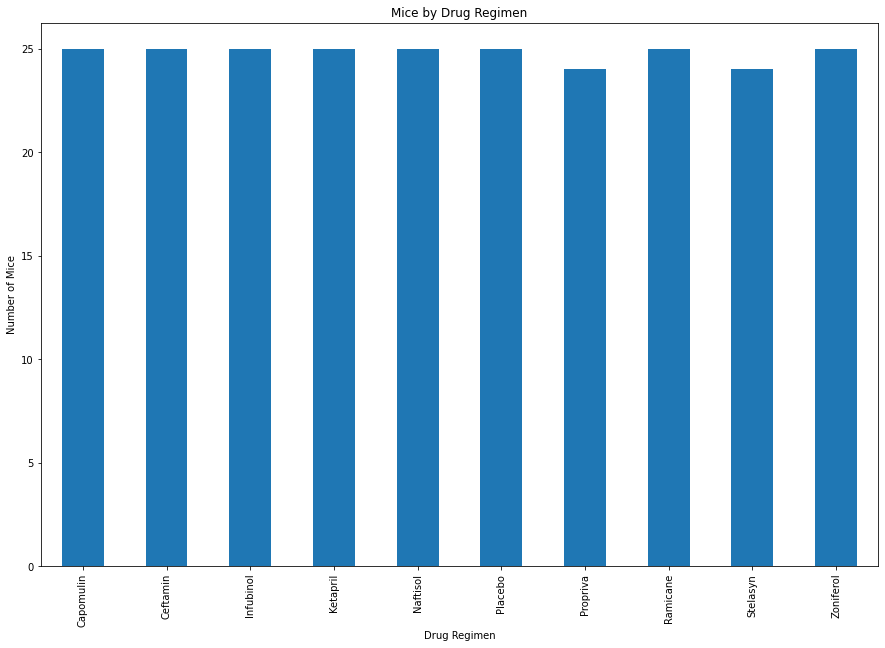

In [10]:
# Doing the same bar chart but using Matplotlib this time!
# Finding the number of unique drug regimens and using that range to define our x axis
x_axis = np.arange(len(clean["Drug Regimen"].unique()))

# Storing the x axis to use for tick locations later
tickloc = x_axis

# Storing the names of all the drug regimens and putting them in order so they match correctly
ticks = sorted(clean["Drug Regimen"].unique())

# Making the bar chart and making it look pretty
plt.figure(figsize=(15,10))
plt.bar(x_axis, regimenbar, color = "#1F77B4", align = "center", width= 0.5)

# Renaming the ticks on the x axis and putting labels and limits
plt.xticks(tickloc, ticks, rotation = "vertical")
plt.xlim(-0.5, len(x_axis) - 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice by Drug Regimen")

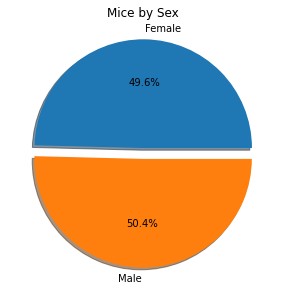

In [11]:
# Making a pie chart using Pandas
# Grouping by sex and getting the number of unique mice
gender = clean.groupby("Sex")["Mouse ID"].nunique()

# Getting rid of the series name, otherwise it would show up on the left of the pie chart
gender.name = ""

# Plotting the pie chart and making it look nice
gender.plot(kind = "pie", autopct='%1.1f%%', shadow=True, explode = [0.1,0], title = "Mice by Sex", figsize = (5,5))

Text(0.5, 1.0, 'Mice by Sex')

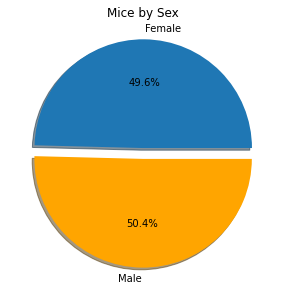

In [12]:
# Making a pie chart this time using Matplotlib
# Getting the labels, size, colors and explode stuff in variables 
labels = gender.index
size = gender
colors = ["#1F77B4", "orange"]
explode = (0.1,0)

# Changing the figure size and plotting the pie chart. Also adding the title
plt.figure(figsize=(5,5))
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.title("Mice by Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Storing four of the drug regimens in their own dataframe
four = clean.loc[(clean["Drug Regimen"] == "Capomulin") | (clean["Drug Regimen"] == "Ramicane") 
                 |(clean["Drug Regimen"] == "Infubinol") |(clean["Drug Regimen"] == "Ceftamin"), :]

# Getting the last data point for each mouse on those four drug regimens, to use in finding outliers
last = four.drop_duplicates(["Mouse ID"], keep = "last")
last.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Putting the drug regimens we have in a list to make the for loop easier
treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Starting a mostly empty dictionary so we can add things to it in our for loop and once it's done we can make a dataframe
quartile_dict = {
    "Drug Regimen":treats,
    "Lower Quartile":[],
    "Upper Quartile":[],
    "Interquartile Range": [],
    "Median": [],
    "Lower Bound":[],
    "Upper Bound":[]
}

# Starting our for loop by looping through the treatments list
for i in treats:    
#   We start by using the name of the drug regimen as i and grab a whole dataframe with just that drug regimen in it
    place = last.loc[(last["Drug Regimen"] == i),:]
    
#   then we find the quantile of the tumor volume column and use it to find the lower, middle, and upper quantiles
    quartile = place["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    medi = quartile[0.5]
    upperq = quartile[0.75]
    
#   Then we use what we found to find the interquartile range, upper bound, and lower bound
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
#   Then we add everything we found to the dictionary we made
    quartile_dict["Lower Quartile"].append(lowerq)
    quartile_dict["Upper Quartile"].append(upperq)
    quartile_dict["Interquartile Range"].append(iqr)
    quartile_dict["Median"].append(medi)
    quartile_dict["Lower Bound"].append(lower_bound)
    quartile_dict["Upper Bound"].append(upper_bound)
#   Then we loop to the next drug regimen

# After that we turn our dictionary into a dataframe and print it out
quartile_df = pd.DataFrame(quartile_dict)
quartile_df

,Drug Regimen,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


In [15]:
# Now we want to use that information to find the outliers in the data
# First we want to get each drug regimen into its own dataframe
capo = last.loc[(last["Drug Regimen"] == "Capomulin"),:]
ram = last.loc[(last["Drug Regimen"] == "Ramicane"),:]
infu = last.loc[(last["Drug Regimen"] == "Infubinol"),:]
ceft = last.loc[(last["Drug Regimen"] == "Ceftamin"),:]


    
# Then we find the outliers for each drug regimen by using the upper and lower bounds from the dictionary we made above
capooutliers = capo.loc[(capo["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][0]) | 
                        (capo["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][0]), :]
ramout = ram.loc[(ram["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][1]) | 
                        (ram["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][1]), :]
infuout = infu.loc[(infu["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][2]) | 
                        (infu["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][2]), :]
ceftout = ceft.loc[(ceft["Tumor Volume (mm3)"] < quartile_dict["Lower Bound"][3]) | 
                        (ceft["Tumor Volume (mm3)"] > quartile_dict["Upper Bound"][3]), :]

# Now we merge all the outlier dataframes together and print them out
outmerge1 = pd.merge(capooutliers, ramout, how="outer")
outmerge2 = pd.merge(infuout, ceftout, how = "outer")
outliers = pd.merge(outmerge1, outmerge2, how = "outer")
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,c326,Infubinol,Female,18,25,5,36.321346,0


Text(0.5, 1.0, 'Final Tumor Volume by Drug Regimen')

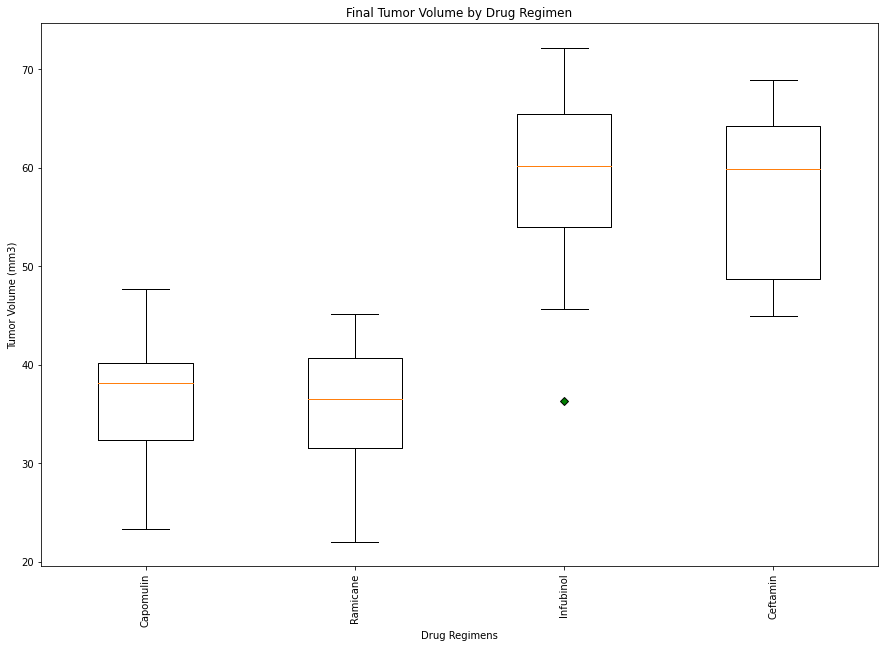

In [16]:
# Now we check our work above by making a box and whisker plot
# First we have to store the tumor volume for each regimen into a list
data = [capo["Tumor Volume (mm3)"], ram["Tumor Volume (mm3)"], 
        infu["Tumor Volume (mm3)"], ceft["Tumor Volume (mm3)"]]

# We can change what the outlier symbol looks like by doing this
green_diamond = dict(markerfacecolor="g", marker = "D")

# Then we plot our box and change the xticks to match our drug regimens. Also title and labels
plt.figure(figsize=(15,10))
plt.boxplot(data, flierprops=green_diamond)
plt.xticks([1,2,3,4], treats, rotation = "vertical")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Regimen")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

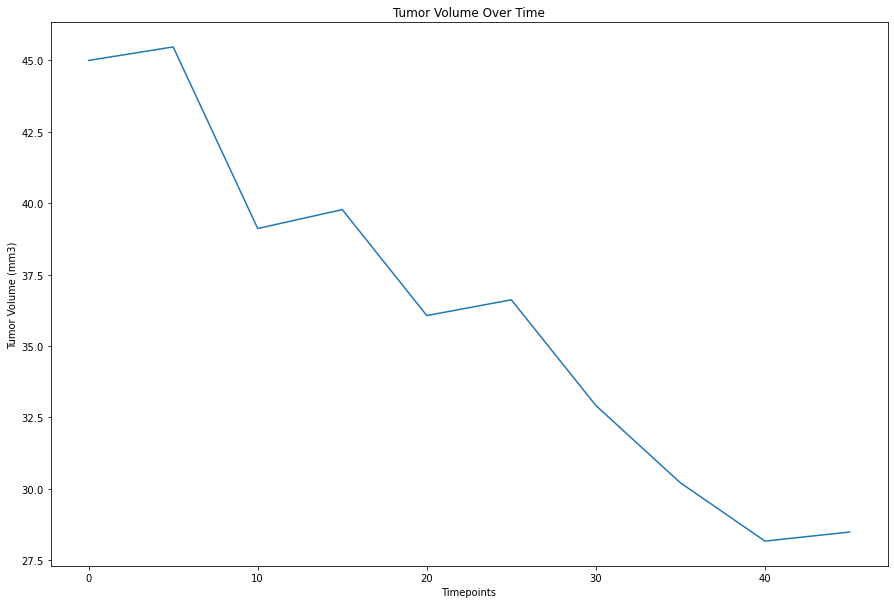

In [17]:
# Now we want to look at the tumor volume over time of a single mouse
# Let's grab a mouse by its ID
capoline = clean.loc[(clean["Mouse ID"] == "x401"),:]

# We want our x axis to be our timepoints so we can see it easier, and store the mouse's tumor volume on our y axis
x_axis = capoline["Timepoint"]
y_axis = capoline["Tumor Volume (mm3)"]

# Then we plot it out and change the labels and size
plt.figure(figsize=(15,10))
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Weight vs Average Tumor Volume')

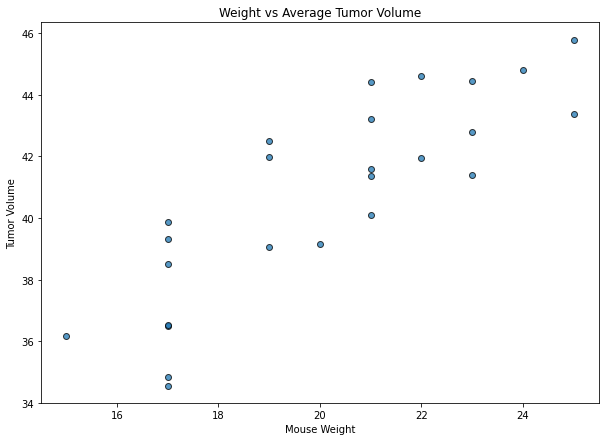

In [47]:
# Next we want to look at the relationship between the tumor volume and mouse weight over the course of one of the regimens
# Lets grab the Capomulin regimen
capo = clean.loc[clean["Drug Regimen"] == "Capomulin", :]

# Then let's get the average tumor volume per mouse and get the weight of each mouse and store them
capo_mean = capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capo_weight = capo.groupby("Mouse ID")["Weight (g)"].first()


# And put it into a scatter plot, changing things so the chart looks pretty
plt.figure(figsize=(10,7))
plt.scatter(capo_weight, capo_mean, edgecolor= "black", alpha = 0.75)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Average Tumor Volume")

## Correlation and Regression

The correlation between weight and tumor volume is 0.84
The r-squared is: 0.7088568047708717
The p-value is: 1.3225722434712642e-07


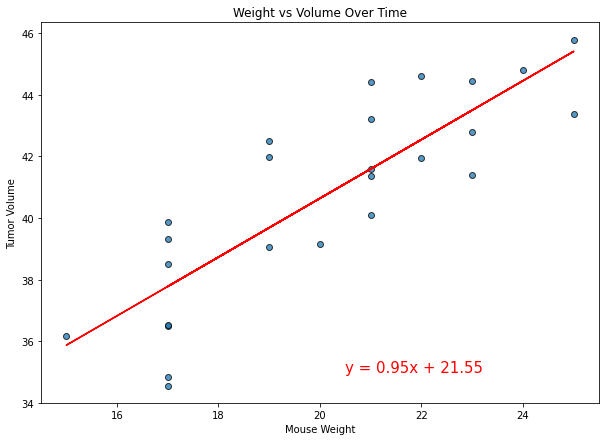

In [49]:
# That was good but we want to find the correlation between weight and tumor volume
# We want to use .pearsonr to find the correlation value
correlation = st.pearsonr(capo_weight,capo_mean)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

# Then we want to find the line of best fit by using linregress
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_weight, capo_mean)
regress_values = weight * slope + intercept

# Next we can put the equation used to find the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# And then we plot it out and make it look nice
plt.figure(figsize=(10,7))
plt.scatter(capo_weight, capo_mean, edgecolor= "black", alpha = 0.75)
plt.plot(capo_weight, regress_values, "r-")
plt.annotate(line_eq, (20.5,35), fontsize=15, color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Volume Over Time")

# We also want to print out the r-value and p-value
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()